<a href="https://colab.research.google.com/github/justice-7/Data-Analysis-Programming/blob/main/DAP_Final(202012770_%EB%B0%95%EC%A0%95%EC%9D%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **주식**
1. 코스피와 코스닥의 차이
2. 상장 주식 수, 거래량, 현재가의 상관관계
3. 삼성전자의 매수 타이밍과 매도 타이밍

In [1]:
import time
import xlwt
import glob  
import sys
import os

import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import scipy.stats as stats

In [ ]:
!pip install -U finance-datareader
!pip install bokeh

!pip install dash
!pip install jupyter_dash

한글 폰트 설치

https://velog.io/@heiswicked/%EC%84%B8%ED%8C%85%EC%9D%B4-%EB%B0%98%EC%9D%B4%EB%8B%A4-Google-COLAB-%ED%95%9C%EA%B8%80%ED%8F%B0%ED%8A%B8%ED%8E%B8

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [4]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='NanumBarunGothic') 

mpl.rc('axes', unicode_minus=False)



---


# 코스피 종목 정보 크롤링

네이버 금융 시가총액 상위 200개 종목 크롤링

참고:
https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=ym7596&logNo=222056342589&categoryNo=0&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView

In [ ]:
!pip install selenium
!pip install --upgrade beautifulsoup4
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

In [6]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import Select

In [7]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')       
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

def get_items(prod_items):
    prod_data = []
    for prod_item in prod_items:
        if len(prod_item) <= 1:
            continue
    
        try:
            name = prod_item.select('td')[1].text.strip()
        except:
            name = '\0'
        try:
            price = int(prod_item.select('td')[2].text.strip().replace(",",""))
        except:
            price = '\0'
        try:
             georae= int(prod_item.select('td')[6].text.strip().replace(",",""))
        except:
            georae = '\0'
        try:
            stockCnt = int(prod_item.select('td')[7].text.strip().replace(",",""))
        except:
            stockCnt = '\0'
        try:
            eps = int(prod_item.select('td')[8].text.strip().replace(",",""))
        except:
            eps = '\0'
        try:
            per = float(prod_item.select('td')[9].text.strip())
        except:
            per = '\0'
        try:
            roe = float(prod_item.select('td')[10].text.strip())
        except:
            roe = '\0'
        try:
            pbr = float(prod_item.select('td')[11].text.strip())
        except:
            pbr = '\0'
        
   
        prod_data.append([name,price,georae,stockCnt,eps,per,roe,pbr])
    return prod_data

[os.remove(f) for f in glob.glob("./KOSPI*.csv")] # 만들어진 파일 삭제

for i in range(1,5):
    url='https://finance.naver.com/sise/sise_market_sum.naver?&page='+str(i)
    driver.get(url)
    time.sleep(2)

    if(i==1):
        #원하는 항목을 체크 후 적용하기 클릭
        driver.find_element_by_id('option4').click()
        driver.find_element_by_id('option15').click()
        driver.find_element_by_id('option23').click()
        driver.find_element_by_id('option24').click()
        driver.find_element_by_xpath('/html/body/div[3]/div[2]/div[2]/div[1]/div[2]/form/div/div/div/a[1]/img').click()

    time.sleep(2)

    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')

    prod_items = soup.select('table.type_2 > tbody > tr')

    prod_data_fin = get_items(prod_items)

    data = pd.DataFrame(prod_data_fin)

    data.columns = ['종목명','현재가','거래량','상장주식수','주당순이익','PER','ROE','PBR']

    data.to_csv('./KOSPI'+str(i)+'.csv')

    time.sleep(2)

all_data = []  
for f in glob.glob('./KOSPI*.csv'):
    df = pd.read_csv(f)  
    all_data.append(df)

dataCombine = pd.concat(all_data, axis=0, ignore_index=True)
 
dataCombine.to_csv("./KOSPI.csv", index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


In [8]:
dfKospi=pd.read_csv('./KOSPI.csv')
dfKospi=dfKospi[['종목명','현재가','거래량','상장주식수','주당순이익','PER','ROE','PBR']]
dfKospi

,종목명,현재가,거래량,상장주식수,주당순이익,PER,ROE,PBR
0,LG이노텍,335500,660728,23667,31557.0,10.63,10.20,2.56
1,롯데케미칼,229500,98199,34275,39751.0,5.77,1.22,0.55
2,SK바이오팜,97600,146720,78313,-516.0,-189.15,-135.18,19.30
3,한온시스템,13300,463500,533800,548.0,24.27,5.09,3.09
4,F&F,885000,30354,7661,NaN,NaN,NaN,16.01
...,...,...,...,...,...,...,...,...
195,SK스퀘어,60900,2566044,141468,NaN,NaN,NaN,NaN
196,KT,32250,893894,261112,3914.0,8.24,4.76,0.52
197,현대중공업,94000,409225,88773,-9163.0,-10.26,-7.86,1.36
198,기업은행,11200,1010008,744301,2702.0,4.15,6.44,0.31


# 코스닥 종목 정보 크롤링

In [9]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')       
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

def get_items(prod_items):
    prod_data = []
    for prod_item in prod_items:
        if len(prod_item) <= 1:
            continue
    
        try:
            name = prod_item.select('td')[1].text.strip()
        except:
            name = '\0'
        try:
            price = int(prod_item.select('td')[2].text.strip().replace(",",""))
        except:
            price = '\0'
        try:
             georae= int(prod_item.select('td')[6].text.strip().replace(",",""))
        except:
            georae = '\0'
        try:
            stockCnt = int(prod_item.select('td')[7].text.strip().replace(",",""))
        except:
            stockCnt = '\0'
        try:
            eps = int(prod_item.select('td')[8].text.strip().replace(",",""))
        except:
            eps = '\0'
        try:
            per = float(prod_item.select('td')[9].text.strip())
        except:
            per = '\0'
        try:
            roe = float(prod_item.select('td')[10].text.strip())
        except:
            roe = '\0'
        try:
            pbr = float(prod_item.select('td')[11].text.strip())
        except:
            pbr = '\0'
        
   
        prod_data.append([name,price,georae,stockCnt,eps,per,roe,pbr])
    return prod_data

[os.remove(f) for f in glob.glob("./KOSDAQ*.csv")]

for i in range(1,5):
    url=' https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page='+str(i)
    driver.get(url)
    time.sleep(2)

    if(i==1):
        #원하는 항목을 체크 후 적용하기 클릭
        driver.find_element_by_id('option4').click()
        driver.find_element_by_id('option15').click()
        driver.find_element_by_id('option23').click()
        driver.find_element_by_id('option24').click()
        driver.find_element_by_xpath('/html/body/div[3]/div[2]/div[2]/div[1]/div[2]/form/div/div/div/a[1]/img').click()

    time.sleep(2)

    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')

    prod_items = soup.select('table.type_2 > tbody > tr')

    prod_data_fin = get_items(prod_items)

    data = pd.DataFrame(prod_data_fin)

    data.columns = ['종목명','현재가','거래량','상장주식수','주당순이익','PER','ROE','PBR']

    data.to_csv('./KOSDAQ'+str(i)+'.csv')

    time.sleep(2)

all_data = []  
for f in glob.glob('./KOSDAQ*.csv'): 
    df = pd.read_csv(f)  
    all_data.append(df)

dataCombine = pd.concat(all_data, axis=0, ignore_index=True)

dataCombine.to_csv("./KOSDAQ.csv", index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


In [10]:
dfKosdaq=pd.read_csv('./KOSDAQ.csv')
dfKosdaq=dfKosdaq[['종목명','현재가','거래량','상장주식수','주당순이익','PER','ROE','PBR']]
dfKosdaq

,종목명,현재가,거래량,상장주식수,주당순이익,PER,ROE,PBR
0,클래시스,18950,154125,64717,732.0,25.89,36.06,7.96
1,하나머티리얼즈,62100,177790,19738,2954.0,21.02,22.82,5.21
2,SFA반도체,7310,5033059,164460,250.0,29.24,5.22,3.11
3,NHN한국사이버결제,33300,320344,36016,935.0,35.61,21.35,6.50
4,에이치엘비생명과학,12450,1191789,95498,-302.0,-41.23,-17.97,3.88
...,...,...,...,...,...,...,...,...
195,유바이오로직스,35950,520398,36274,-616.0,-58.36,-91.23,10.97
196,에스에프에이,36300,51724,35909,2849.0,12.74,11.33,1.21
197,바이오니아,50500,3520433,25810,2276.0,22.19,65.71,7.57
198,메드팩토,62300,441811,20510,-850.0,-73.29,-37.72,25.81


# 코스피와 코스닥의 차이

In [11]:
dfKospi_num=dfKospi[['현재가','거래량','상장주식수','주당순이익','PER','ROE','PBR']]
dfKosdaq_num=dfKosdaq[['현재가','거래량','상장주식수','주당순이익','PER','ROE','PBR']]

### 정규화

In [12]:
from sklearn.preprocessing import MinMaxScaler
def min_max_scaling(df):
    scaler = MinMaxScaler()
    df_norm=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    return df_norm

dfKospi_norm=min_max_scaling(dfKospi_num)
dfKosdaq_norm=min_max_scaling(dfKosdaq_num)

### 결측값 대체(K-NN Imputation)


k값: https://ichi.pro/ko/python-mich-knneulo-nulag-doen-deiteoleul-cheolihaneun-bangbeob-53388502705981

그래프: https://codetorial.net/matplotlib/double_y_axis.html
https://pydole.tistory.com/entry/Python-matplotlib-%EA%B7%B8%EB%9E%98%ED%94%84%EC%97%90-%EA%B0%92-%ED%91%9C%EC%8B%9C-%ED%95%98%EA%B8%B0


In [13]:
# 결측값 존재
print("- 코스피")
print(dfKospi_norm.isnull().sum())

print("\n- 코스닥")
print(dfKosdaq_norm.isnull().sum())

- 코스피
현재가       0
거래량       0
상장주식수     0
주당순이익    17
PER      20
ROE      25
PBR      15
dtype: int64

- 코스닥
현재가       0
거래량       0
상장주식수     0
주당순이익     3
PER       6
ROE      11
PBR       2
dtype: int64


k값에 따른 오차 구하기(RandomForestRegressor)

In [14]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

def optimize_k(data, target):
    errors = []
    for k in range(1, 10, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors

kospi_errors = optimize_k(data=dfKospi_norm, target='상장주식수')
kosdaq_errors = optimize_k(data=dfKosdaq_norm, target='상장주식수')
print("kospi", kospi_errors)
print("kosdaq", kosdaq_errors)

kospi [{'K': 1, 'RMSE': 0.14507490170514478}, {'K': 3, 'RMSE': 0.14690370211080067}, {'K': 5, 'RMSE': 0.1450669149821654}, {'K': 7, 'RMSE': 0.14649488518304438}, {'K': 9, 'RMSE': 0.14708836560711838}]
kosdaq [{'K': 1, 'RMSE': 0.1317479180511834}, {'K': 3, 'RMSE': 0.12998315035111033}, {'K': 5, 'RMSE': 0.13244529705114472}, {'K': 7, 'RMSE': 0.13258701205063145}, {'K': 9, 'RMSE': 0.13188661410184174}]


최적 k값 구하기(오차가 최소인 값)

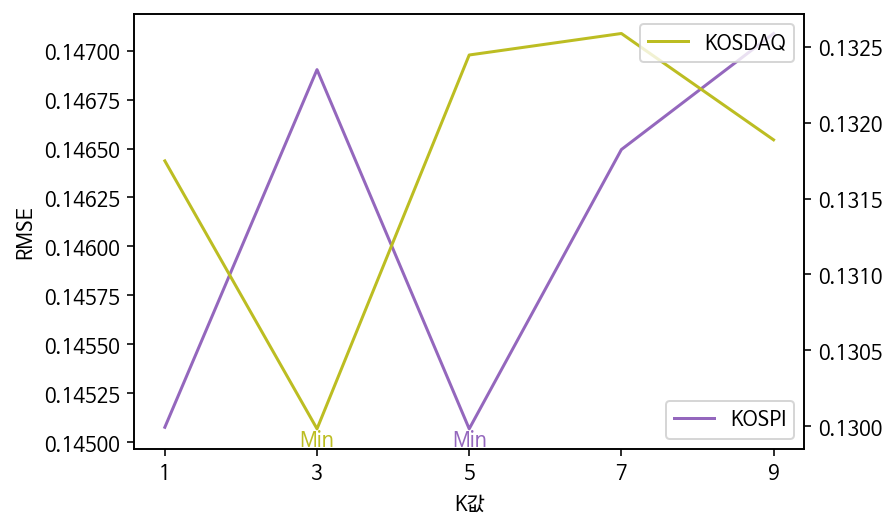

kospi의 K값: 5
kosdaq의 K값: 3


In [39]:
x=[]
y=[]
for i in kospi_errors:
    x.append(i.get('K'))
    y.append(i.get('RMSE'))

fig, ax=plt.subplots()
ax.plot(x, y, label='KOSPI', color='C4')
plt.xticks(x)

x2=[]
y2=[]
for i in kosdaq_errors:
    x2.append(i.get('K'))
    y2.append(i.get('RMSE'))

ax2=ax.twinx()
ax2.plot(x2, y2, label='KOSDAQ', color='C8')

ax.set_xlabel("K값")
ax.set_ylabel("RMSE")

ax.legend(loc='lower right')
ax2.legend(loc='upper right')

ax.text(x[y.index(min(y))],min(y), 'Min', color='C4', 
        horizontalalignment='center', verticalalignment='top')
ax2.text(x2[y2.index(min(y2))],min(y2), 'Min', color='C8', 
        horizontalalignment='center', verticalalignment='top')

plt.show()

kospiMinK=x[y.index(min(y))]
kosdaqMinK=x2[y2.index(min(y2))]

print("kospi의 K값:", kospiMinK)
print("kosdaq의 K값:", kosdaqMinK)


In [16]:
# 데이터 null값 knn으로 채우기
from sklearn.impute import KNNImputer
def knn(df,k):
    imputer=KNNImputer(n_neighbors=k, weights="uniform")

    imputer.fit_transform(df)
    return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

kospi= knn(dfKospi_num, kospiMinK)
kosdaq= knn(dfKosdaq_num, kosdaqMinK)

In [17]:
# 결측값 X
print("- 코스피")
print(kospi.isnull().sum())

print("\n- 코스닥")
print(kosdaq.isnull().sum())

- 코스피
현재가      0
거래량      0
상장주식수    0
주당순이익    0
PER      0
ROE      0
PBR      0
dtype: int64

- 코스닥
현재가      0
거래량      0
상장주식수    0
주당순이익    0
PER      0
ROE      0
PBR      0
dtype: int64


코스피 코스닥 그래프

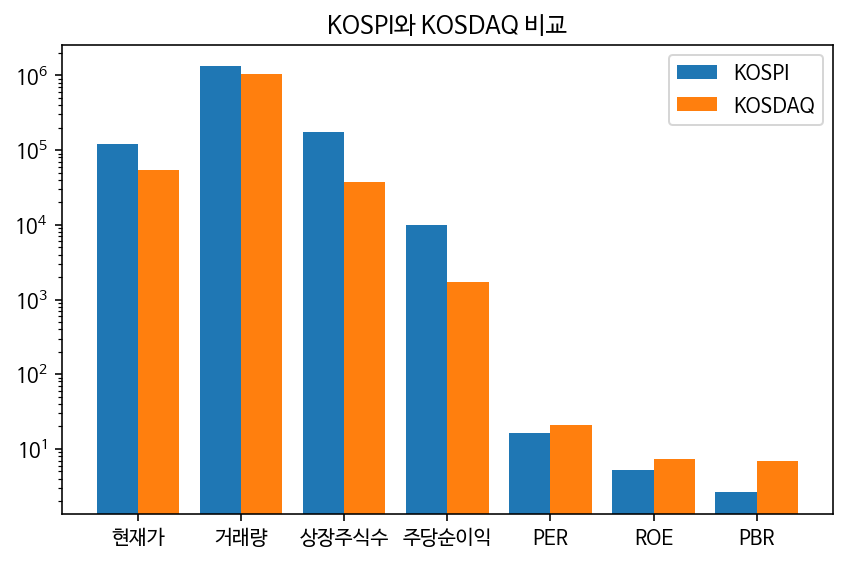

In [18]:
labels = ['현재가','거래량','상장주식수','주당순이익','PER','ROE','PBR']

kospiData = []
kosdaqData = []
for i in  labels:
    kospiData.append(kospi[i].mean())
    kosdaqData.append(kosdaq[i].mean())

x = np.arange(len(labels))
width=0.4

fig, ax1= plt.subplots()
ax1.bar(x - width/2, kospiData, width, label='KOSPI')
ax1.bar(x + width/2, kosdaqData, width, label='KOSDAQ')

plt.title('KOSPI와 KOSDAQ 비교')

ax1.legend()
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

plt.yscale("log")

fig.tight_layout()
plt.show()

결론
*   주당순이익(EPS)을 보면 코스닥 기업에 비해 코스피 기업의 투자가치가 더 높다는 것을 알 수있다.
*   PER과 PBR을 봤을 때 코스피 기업에 비해 코스닥 기업이 고평가되었다는 것을 알 수 있다.
*  ROE를 보면 코스피 기업에 비해 코스닥 기업이 더 효율적인 영업활동을 했다는 것을 알 수 있다.
*  현재가, 거래량, 상장주식수는 코스피가 코스닥에 비해 높다.




---


# 상장주식수, 거래량, 현재가의 상관관계
가설
*   상장주식수가 많으면 거래량이 많을 것이다.
*   현재가가 높으면(비싸면) 거래량이 적을 것이다.

In [19]:
codfKospi=dfKospi[['현재가','거래량','상장주식수']]

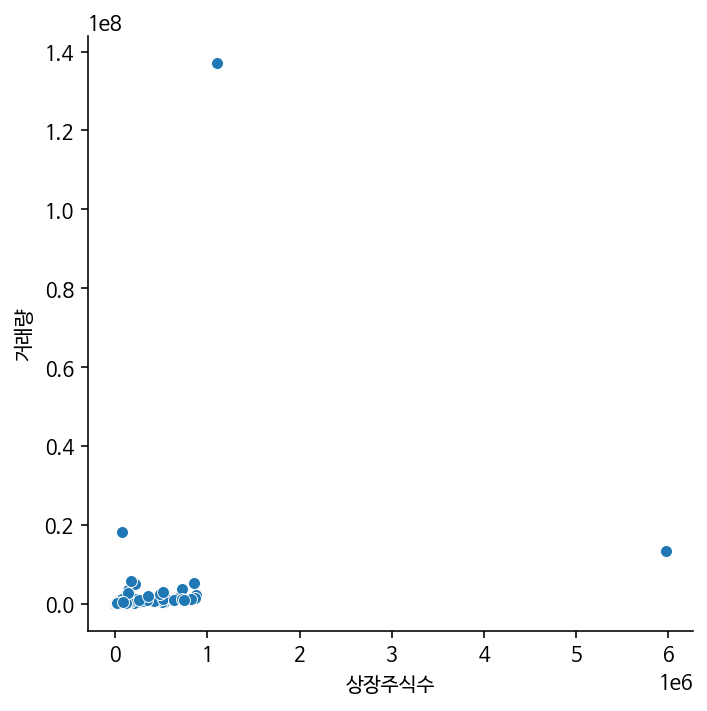

In [20]:
ax=sns.relplot(x='상장주식수', y='거래량', data=codfKospi)

>이상치 제거가 필요해보인다.

### 이상치 탐지 & 제거

https://claryk.tistory.com/4

In [21]:
#이상치 탐지
def outlier_iqr(data, column):     
    Q1, Q3 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = Q3 - Q1    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = Q1 - cut_off, Q3 + cut_off     
    
    print('IQR:',iqr)     
    print('lower bound 값:', lower)     
    print('upper bound 값:', upper)    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    print('총 이상치 개수:', data1.shape[0] + data2.shape[0])

    return upper, lower

upper, lower = outlier_iqr(codfKospi,'거래량')

IQR: 457284.0
lower bound 값: -604896.25
upper bound 값: 1224239.75
총 이상치 개수: 19


In [22]:
#이상치 제거
codfKospi = codfKospi[(codfKospi['거래량'] < upper) & (codfKospi['거래량'] > lower)]

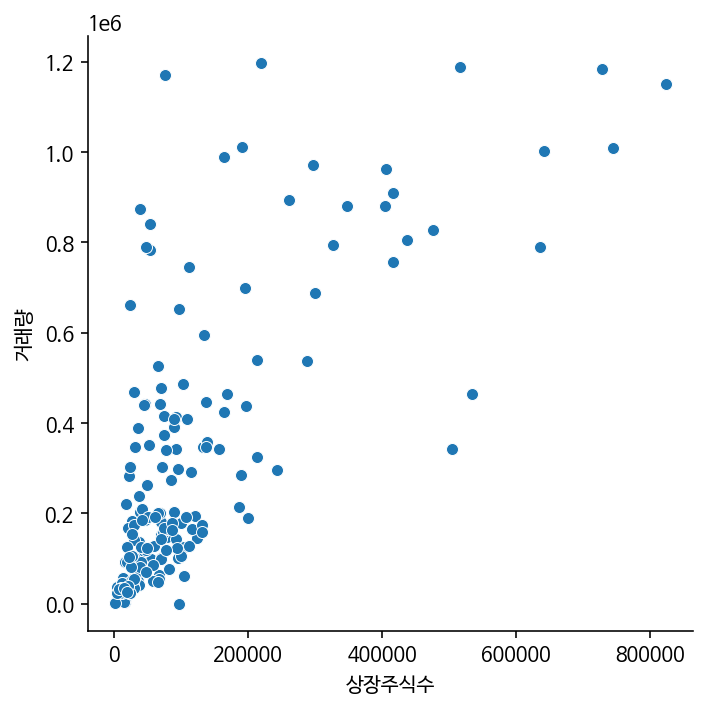

In [23]:
ax=sns.relplot(x='상장주식수', y='거래량', data=codfKospi)

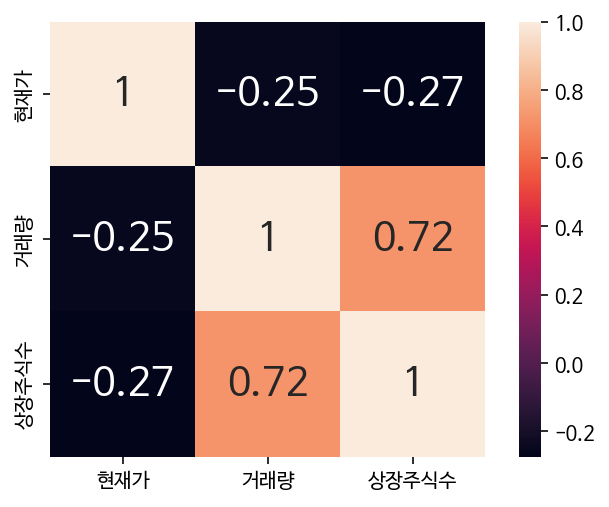

In [24]:
corr = codfKospi.corr(method = 'pearson') 
sns.heatmap(corr, annot=True, annot_kws={'size' : 20},square = 'True')

결론
*   상장주식수와 거래량은 강한 양적 상관관계를 나타낸다.
*   현재가와 거래량, 현재가와 상장주식수는 거의 관계가 없다고 볼 수 있다.



---


# 삼성전자
매수 타이밍과 매도 타이밍을 알아보자

데이터 출처: http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201

파일 업로드:https://velog.io/@moksu/colab%EC%97%90%EC%84%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%88%EB%9F%AC%EC%98%A4%EA%B8%B0

그래프:https://coding-kindergarten.tistory.com/124
https://blog.naver.com/sssrew1/221840758486

In [26]:
from google.colab import files
uploaded = files.upload()

Saving samsungM.csv to samsungM.csv


삼성전자: 2019.1월 - 2021.12월 데이터 사용


In [27]:
dfSamsungM = pd.read_csv('samsungM.csv', encoding='cp949',parse_dates=['연월'])
dfSamsungM.head()

,연월,종가,최고가(종가),최저가(종가),거래량_합계,거래량_일평균,거래대금_합계,거래대금_일평균
0,2021-12-01,77100,78200,74400,223849157,15363084,17103243049046,1174441922670
1,2021-11-01,71300,75300,69900,313117871,14232631,22547542441544,1024888292797
2,2021-10-01,69800,73200,68800,300193653,15799666,21198019167368,1115685219335
3,2021-09-01,74100,77700,74100,281233337,14801755,21441192047022,1128483791949
4,2021-08-01,76700,82900,72700,499862582,23802980,38387973028676,1827998715651


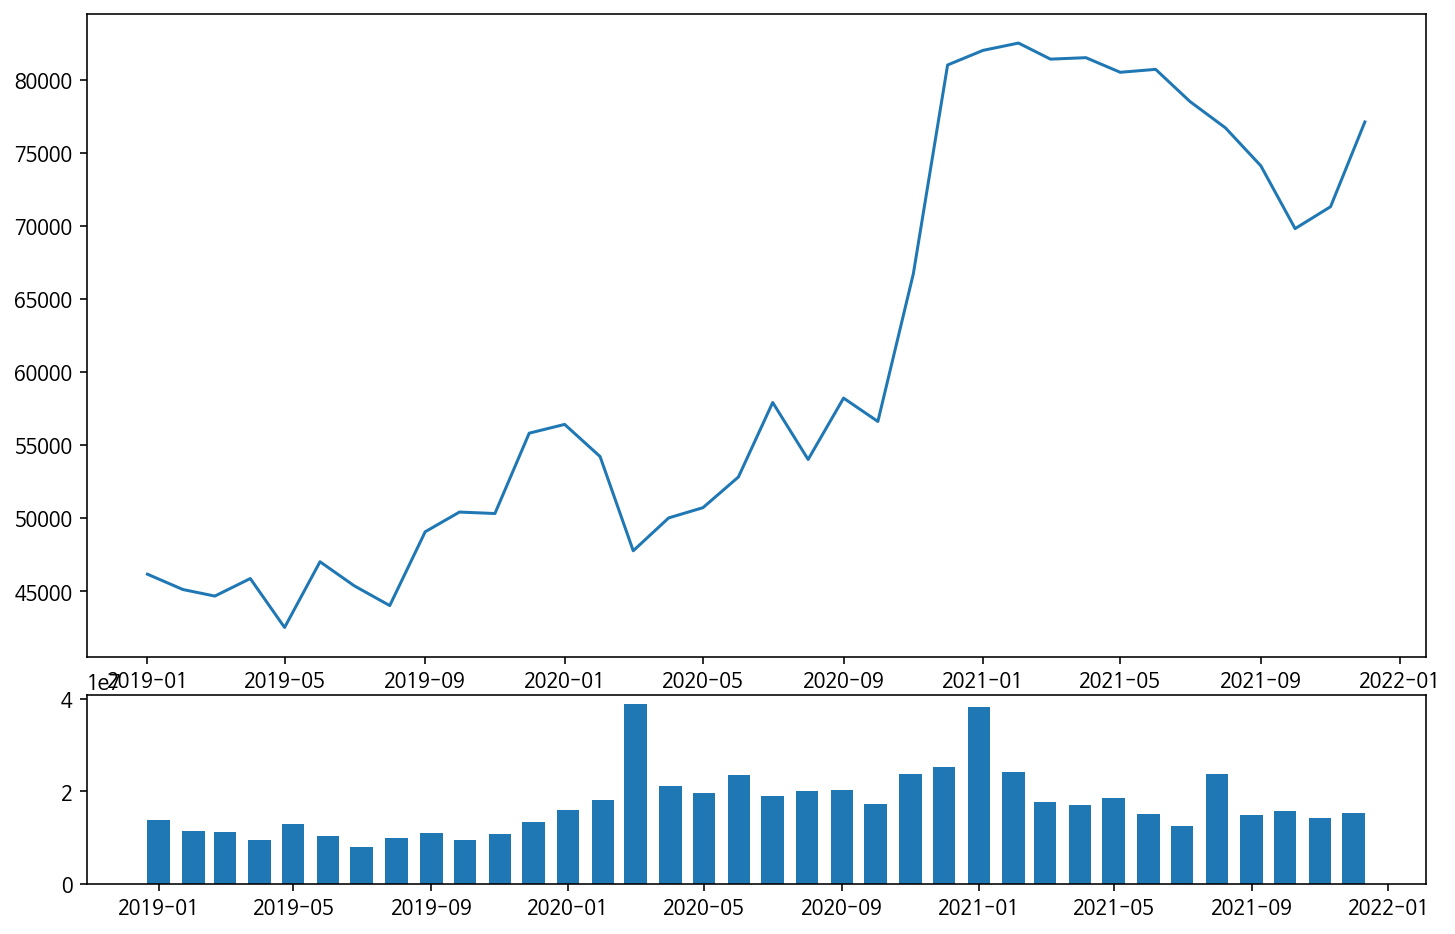

In [28]:
def graph(df):
    일자=[]
    종가=[]
    거래량=[]
    for i in range(0, len(df)):
        일자.append(df.연월[i])
        종가.append(int(df.종가[i]))
        거래량.append(int(df.거래량_일평균[i]))

    fig = plt.figure(figsize=(12, 8))
    top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
    bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
    top_axes.plot(일자,종가)
    bottom_axes.bar(일자, 거래량, width=20)
    plt.show()
    return 일자, 종가, 거래량
일자, 종가, 거래량=graph(dfSamsungM)

저점: 19년 5월 / 고점: 21년 2월

In [30]:
월종가=종가.copy()
월종가=sorted(월종가)
print("min: ", dfSamsungM.연월[종가.index(월종가[0])])
print("max: ", dfSamsungM.연월[종가.index(월종가[len(종가)-1])])

min:  2019-05-01 00:00:00
max:  2021-02-01 00:00:00


삼성전자 - 2019년 5월 데이터

In [31]:
s2019_5=pd.read_csv('s_2019_5.csv', encoding='cp949',parse_dates=['일자'])
s2019_5=s2019_5[['EPS','PER','BPS','PBR']]
s2019_5.head()

,EPS,PER,BPS,PBR
0,6461,6.58,35342,1.20
1,6461,6.59,35342,1.20
2,6461,6.47,35342,1.18
3,6461,6.59,35342,1.20
4,6461,6.60,35342,1.21


삼성전자 - 2021년 2월 데이터

In [32]:
s2021_2=pd.read_csv('s_2021_2.csv', encoding='cp949',parse_dates=['일자'])
s2021_2=s2021_2[['EPS','PER','BPS','PBR']]
s2021_2.head()

,EPS,PER,BPS,PBR
0,3166,26.06,37528,2.20
1,3166,26.94,37528,2.27
2,3166,25.90,37528,2.19
3,3166,25.90,37528,2.19
4,3166,25.96,37528,2.19


In [34]:
labels=['EPS','PER','BPS','PBR']
smin=[]
smax=[]
for i in labels:
    smin.append(s2019_5[i].mean())
    smax.append(s2021_2[i].mean())

print("- 저점: 매수 타이밍")
for j in range (len(labels)):
    print(labels[j],": ", smin[j])

print("\n- 고점: 매도 타이밍")
for j in range (len(labels)):
    print(labels[j],": ", smax[j])

- 저점: 매수 타이밍
EPS :  6461.0
PER :  6.659523809523808
BPS :  35342.0
PBR :  1.2171428571428573

- 고점: 매도 타이밍
EPS :  3166.0
PER :  26.256666666666668
BPS :  37528.0
PBR :  2.2150000000000003


결론
*   삼성전자는 PER이 7이고 PBR이 1일 때 사는 것이 좋다.
*   삼성전자는 PER이 26이고 PBR이 2일 때는 파는 것이 좋다. 



---


# 삼성전자, 카카오, 네이버 주가 그래프
https://m.blog.naver.com/freed0om/221981509903

In [37]:
import dash
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output

from jupyter_dash import JupyterDash

from plotly.subplots import make_subplots
import FinanceDataReader as fdr

# Load Dash App
app = JupyterDash()

# Define App
app.layout = html.Div(id = 'parent',
                      children = [html.H1(id = 'H1', children = '2021 주가',
                                          style = {'textAlign':'center',
                                                   'marginTop':40,
                                                   'marginBottom':40}),
                                  dcc.Dropdown(id='dropdown',
                                               options=[{'label':'삼성전자', 'value':'005930'},
                                                        {'label':'카카오', 'value':'035720'},
                                                        {'label':'네이버', 'value':'035420'}
                                                        ],
                                               value='005930'
                                               ),
                                  dcc.Graph(id = 'plot')
                                  ])

# Define callback decorator and it's function    
@app.callback(Output(component_id='plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    
    df = fdr.DataReader(dropdown_value, '2021-01-01')
    
    fig = make_subplots(specs=[[{'secondary_y': True}]])
    x = df.index.tolist()
    y = df['Close']
    fig.add_trace(go.Scatter(mode='lines', name='2021 주가', x = x,  y = y))
    annotations = []
    annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1, xanchor='center', yanchor='top',
                            font=dict(family='Arial', size=12, color='rgb(150,150,150)'),
                            showarrow=False))
    annotations.append(dict(xref='paper', x=0.95, y=y.tail(1)[0],
                            xanchor='left', yanchor='middle',
                            text= str(x[-1:])[12:22] +' : ' + f'{y.tail(1)[0]:,.0f}' ,
                            font=dict(family='Arial', size=12),
                            showarrow=False))

    fig.update_layout(annotations = annotations)

    return fig

if __name__ == '__main__': 
    app.run_server()


Dash app running on:


<IPython.core.display.Javascript object>

삼성전자 주가, 거래량 그래프

https://coding-kindergarten.tistory.com/124?category=988295

In [38]:
# 삼성전자 코드: 005930
df_samsung = fdr.DataReader('005930', '2019-01-01')
fdr.chart.plot(df_samsung, title='삼성전자 주가(2019.1.1~현재)', ylabel='단위:KRW', width=1000, height=600)